####  租房信息數據分析:

    1) 熟悉數據
    2) 主要數據提取與清洗
    3) 數據統計與可視化分析

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams['font.sans-serif'] = ['PingFang SC']
plt.rcParams['font.serif'] = ['PingFang SC']
sns.set_style('darkgrid', {'font.sans-serif':['PingFang SC', 'Droid Sans Fallback']})

In [180]:
#  重置matplotlib字体库
from matplotlib.font_manager import _rebuild
_rebuild()

In [181]:
#  显示matplotlib字体库
import matplotlib.font_manager
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

.Keyboard
.LastResort
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Symbols
.SF NS Symbols
.SF NS Symbols
.SF NS Sy

In [153]:
#  matplotlib关键词
mpl.rcParams.keys()

/Users/yangsan/anaconda3/envs/ys/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [3]:
fpath = '/Users/yangsan/练习/Rentinfo.csv'
df = pd.read_csv(fpath, dtype={'price':str})

In [16]:
df

,title,region,street,murl,price,haus,typ,gross,gegen,issue,live,date,see,hoch,lift,carport,water,elec,gas
0,东花市北里中区 1室1厅 5500元,东城,东花市,https://bj.lianjia.com/zufang/BJ21078017538470...,5500,租赁方式未知,1室1厅1卫,48㎡,朝东 西,3个月前,随时入住,暂无数据,需提前预约,中楼层/6层,无,暂无数据,民水,民电,有
1,富贵园三区 2室1厅 8200元,东城,东花市,https://bj.lianjia.com/zufang/BJ21801784275155...,8200,租赁方式未知,2室1厅1卫,64㎡,朝东北,15天前,随时入住,暂无数据,需提前预约,中楼层/16层,有,暂无数据,民水,民电,有
2,整租 · 富贵园四区 1室1厅 7700元,东城,东花市,https://bj.lianjia.com/zufang/BJ20659281743482...,7700,整租,1室1厅1卫,55㎡,朝西,5个月前,随时入住,1~2年,需提前预约,低楼层/10层,有,暂无数据,民水,民电,有
3,整租 · 花市枣苑三期 3室2厅 16000元,东城,东花市,https://bj.lianjia.com/zufang/BJ21114754097736...,16000,整租,3室2厅2卫,126㎡,朝东南,3个月前,随时入住,2~3年,需提前预约,高楼层/17层,有,租用车位,民水,民电,有
4,东花市北里中区 3室1厅 8800元,东城,东花市,https://bj.lianjia.com/zufang/BJ20796454852571...,8800,租赁方式未知,3室1厅1卫,89㎡,朝东 西 北,5个月前,随时入住,暂无数据,需提前预约,高楼层/6层,无,暂无数据,民水,民电,有
5,整租 · 花市枣苑三期 1室0厅 6700元,东城,东花市,https://bj.lianjia.com/zufang/BJ20891404575058...,6700,整租,1室0厅1卫,50㎡,朝北,4个月前,随时入住,2~3年,暂无数据,高楼层/18层,有,暂无数据,民水,民电,有
6,整租 · 本家润园三期 2室1厅 7600元,东城,东花市,https://bj.lianjia.com/zufang/BJ21715227702096...,7600,整租,2室1厅1卫,64㎡,朝西,27天前,随时入住,2~3年,需提前预约,中楼层/18层,有,暂无数据,民水,民电,有
7,整租 · 本家润园三期 2室1厅 8000元,东城,东花市,https://bj.lianjia.com/zufang/BJ21129297416099...,8000,整租,2室1厅1卫,70㎡,朝西,3个月前,随时入住,2~3年,需提前预约,低楼层/18层,有,暂无数据,民水,民电,有
8,整租 · 玉林东里三区 3室1厅 6600元,丰台,右安门外,https://bj.lianjia.com/zufang/BJ20677620113153...,6600,整租,3室1厅1卫,76㎡,朝南 北,5个月前,随时入住,2~3年,需提前预约,高楼层/6层,无,暂无数据,民水,民电,有
9,整租 · 南二环玉林里小区塔楼朝南两居室拎包入住欢迎看房,丰台,右安门外,https://bj.lianjia.com/zufang/BJ21511859274593...,5500,整租,2室1厅1卫,60㎡,朝南,1个月前,随时入住,2~3年,需提前预约,高楼层/20层,有,暂无数据,民水,民电,有


In [4]:
# 数据去重:pd.drop_duplicates(使用scrapy抓取数据，不需要考虑去重，因为scrapy已经做了去重处理)
dd = pd.DataFrame({'a':[1,2,2,3], 'b':[3,3,4,5]})

In [5]:
dd.drop_duplicates(subset=['a'])

,a,b
0,1,3
1,2,3
3,3,5


In [17]:
len(df.drop_duplicates('murl')), len(df)

(17024, 17024)

In [4]:
#  获取部分数据
hdata = df.filter(items=['price', 'gross', 'hoch'])

In [19]:
hdata

,price,gross,hoch
0,5500,48㎡,中楼层/6层
1,8200,64㎡,中楼层/16层
2,7700,55㎡,低楼层/10层
3,16000,126㎡,高楼层/17层
4,8800,89㎡,高楼层/6层
5,6700,50㎡,高楼层/18层
6,7600,64㎡,中楼层/18层
7,8000,70㎡,低楼层/18层
8,6600,76㎡,高楼层/6层
9,5500,60㎡,高楼层/20层


In [21]:
tmp = hdata[:5]
tmp

,price,gross,hoch
0,5500,48㎡,中楼层/6层
1,8200,64㎡,中楼层/16层
2,7700,55㎡,低楼层/10层
3,16000,126㎡,高楼层/17层
4,8800,89㎡,高楼层/6层


In [6]:
import re
def func(val):
#     print(val)
    v = re.search('\d+\.?', val).group()
    return v

In [36]:
re.search('\d+\.?', '高楼层/6层').group()

'6'

In [7]:
hdata = hdata.applymap(func)

In [5]:
#  删除na数据项
hdata = hdata.dropna()

In [8]:
hdata = hdata.astype('f')

In [9]:
hdata.max()

price    220000.0
gross      1064.0
hoch         52.0
dtype: float32

In [10]:
hdata.min()

price    400.0
gross     10.0
hoch       0.0
dtype: float32

In [49]:
df[df.price == '400']

,title,region,street,murl,price,haus,typ,gross,gegen,issue,live,date,see,hoch,lift,carport,water,elec,gas
6184,车位出租，地下一层，清露园车位,门头沟,门头沟其它,https://bj.lianjia.com/zufang/BJ21236033827734...,400,租赁方式未知,1室0厅0卫,29㎡,朝南,3个月前,随时入住,暂无数据,需提前预约,地下室/0层,无,暂无数据,民水,民电,有


/Users/yangsan/anaconda3/envs/ys/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


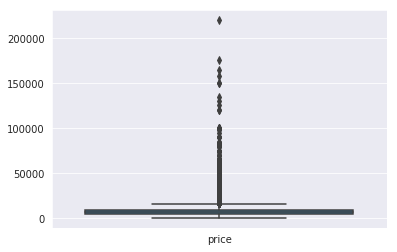

In [50]:
sns.boxplot(x=['price'], y=[hdata.price])

In [51]:
#  清洗异常值数据
len(hdata[(hdata.price>1000) & (hdata.price<20000)]), len(hdata)

(15765, 17023)

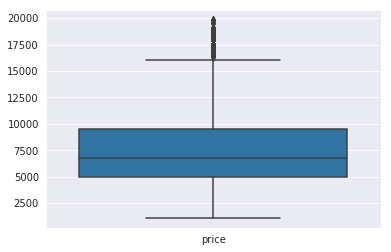

In [74]:
hdata = hdata[(hdata.price>1000) & (hdata.price<20000) \
              & (hdata.hoch>10) & (hdata.hoch<30) \
             & (hdata.gross>10)]
sns.boxplot(x=['price'], y=[hdata.price])

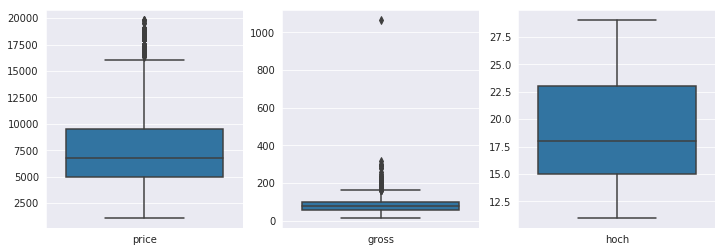

In [75]:
index = 1
plt.figure(figsize=(12, 4))
for key in hdata.columns.values:
    plt.subplot(1,3,index)
    index += 1
    sns.boxplot(x=[key], y=[hdata[key]])

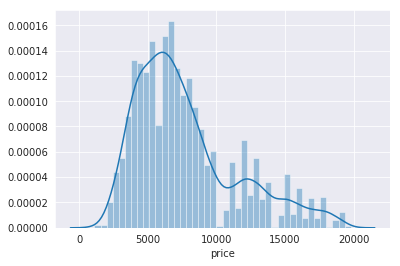

In [77]:
sns.distplot(hdata.price)

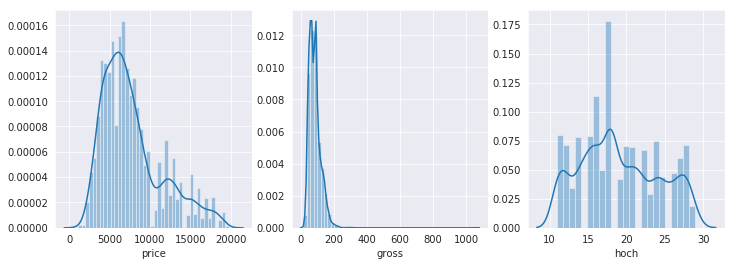

In [79]:
index = 1
plt.figure(figsize=(12, 4))
for key in hdata.columns.values:
    plt.subplot(1,3,index)
    index += 1
    sns.distplot(hdata[key])

In [12]:
#  数据分段统计
steps = list(range(1,13))
steps

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
steps.insert(0,0)
steps.append(20)
steps

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]

In [14]:
steps = np.array(steps)*1000
steps

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 20000])

In [15]:
result = pd.cut(hdata.price, steps)

In [96]:
type(result)

pandas.core.series.Series

In [16]:
Uprice = result.value_counts()

In [17]:
Uprice = Uprice.sort_index()

In [103]:
len(Uprice)

13

In [18]:
index = list(range(13))
xindex = ['%dk+'%val for val in range(1, 14)]

In [107]:
index, xindex

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 ['1k+',
  '2k+',
  '3k+',
  '4k+',
  '5k+',
  '6k+',
  '7k+',
  '8k+',
  '9k+',
  '10k+',
  '11k+',
  '12k+',
  '13k+'])

In [119]:
plt.text?

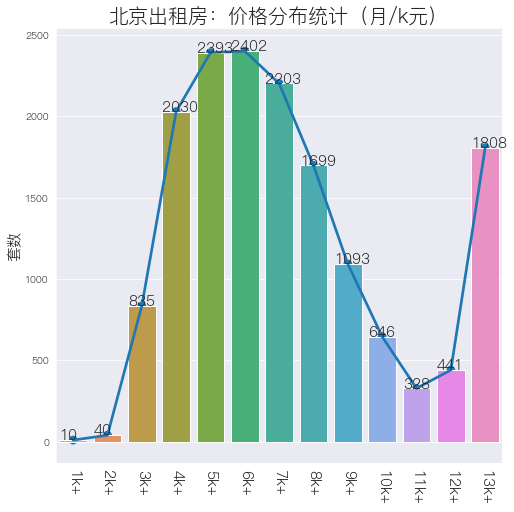

In [19]:
plt.figure(figsize=(8,8))
ax = sns.barplot(Uprice.index, Uprice.values)
sns.pointplot(index, Uprice.values)
ax.set_ylabel('套数', fontsize=15)
ax.set_title('北京出租房：价格分布统计（月/k元）', fontsize=20)
tmp = plt.xticks(index, xindex, fontsize=15, rotation=270)
for x, y in zip(index, Uprice.values):
    plt.text(x-0.4, y+1, y, fontsize=15)

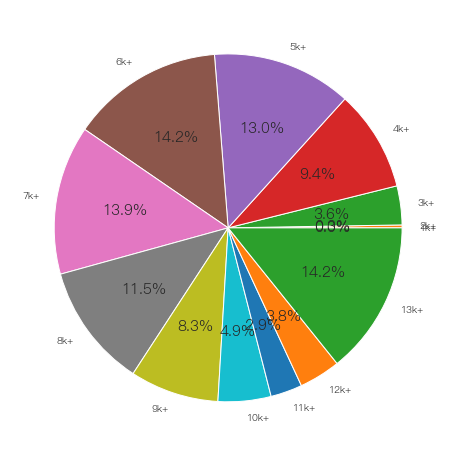

In [192]:
plt.figure(figsize=(8,8))
plt.axes(aspect=1)
wedges, texts, autotexts = plt.pie(Uprice.values, labels=xindex, autopct='%3.1f%%')
r = plt.setp(autotexts, size=15, weight='bold')

In [22]:
#  根据hdata获取有效房子数 .loc搜索keys(关键词) .iloc搜索index(索引)
adsdata = df.iloc[hdata.index.values]
adsdata

,title,region,street,murl,price,haus,typ,gross,gegen,issue,live,date,see,hoch,lift,carport,water,elec,gas
0,东花市北里中区 1室1厅 5500元,东城,东花市,https://bj.lianjia.com/zufang/BJ21078017538470...,5500,租赁方式未知,1室1厅1卫,48㎡,朝东 西,3个月前,随时入住,暂无数据,需提前预约,中楼层/6层,无,暂无数据,民水,民电,有
1,富贵园三区 2室1厅 8200元,东城,东花市,https://bj.lianjia.com/zufang/BJ21801784275155...,8200,租赁方式未知,2室1厅1卫,64㎡,朝东北,15天前,随时入住,暂无数据,需提前预约,中楼层/16层,有,暂无数据,民水,民电,有
2,整租 · 富贵园四区 1室1厅 7700元,东城,东花市,https://bj.lianjia.com/zufang/BJ20659281743482...,7700,整租,1室1厅1卫,55㎡,朝西,5个月前,随时入住,1~2年,需提前预约,低楼层/10层,有,暂无数据,民水,民电,有
3,整租 · 花市枣苑三期 3室2厅 16000元,东城,东花市,https://bj.lianjia.com/zufang/BJ21114754097736...,16000,整租,3室2厅2卫,126㎡,朝东南,3个月前,随时入住,2~3年,需提前预约,高楼层/17层,有,租用车位,民水,民电,有
4,东花市北里中区 3室1厅 8800元,东城,东花市,https://bj.lianjia.com/zufang/BJ20796454852571...,8800,租赁方式未知,3室1厅1卫,89㎡,朝东 西 北,5个月前,随时入住,暂无数据,需提前预约,高楼层/6层,无,暂无数据,民水,民电,有
5,整租 · 花市枣苑三期 1室0厅 6700元,东城,东花市,https://bj.lianjia.com/zufang/BJ20891404575058...,6700,整租,1室0厅1卫,50㎡,朝北,4个月前,随时入住,2~3年,暂无数据,高楼层/18层,有,暂无数据,民水,民电,有
6,整租 · 本家润园三期 2室1厅 7600元,东城,东花市,https://bj.lianjia.com/zufang/BJ21715227702096...,7600,整租,2室1厅1卫,64㎡,朝西,27天前,随时入住,2~3年,需提前预约,中楼层/18层,有,暂无数据,民水,民电,有
7,整租 · 本家润园三期 2室1厅 8000元,东城,东花市,https://bj.lianjia.com/zufang/BJ21129297416099...,8000,整租,2室1厅1卫,70㎡,朝西,3个月前,随时入住,2~3年,需提前预约,低楼层/18层,有,暂无数据,民水,民电,有
8,整租 · 玉林东里三区 3室1厅 6600元,丰台,右安门外,https://bj.lianjia.com/zufang/BJ20677620113153...,6600,整租,3室1厅1卫,76㎡,朝南 北,5个月前,随时入住,2~3年,需提前预约,高楼层/6层,无,暂无数据,民水,民电,有
9,整租 · 南二环玉林里小区塔楼朝南两居室拎包入住欢迎看房,丰台,右安门外,https://bj.lianjia.com/zufang/BJ21511859274593...,5500,整租,2室1厅1卫,60㎡,朝南,1个月前,随时入住,2~3年,需提前预约,高楼层/20层,有,暂无数据,民水,民电,有


In [27]:
adsdata = adsdata.filter(items=['region', 'street'])
#  数据拼接
hpdata = pd.concat([hdata, adsdata], axis=1)
#  数据分组
data = hpdata.groupby('region')
#  数据统计
result = data.agg(['count', 'mean', min, max])
xvals = result.index.values
result

price                                 gross                             \
       count          mean     min       max count        mean    min     max   
region                                                                          
东城       826  10766.053711  2300.0   80000.0   826   80.731232   10.0   674.0   
丰台      1886   7156.608398  2500.0   95000.0  1886   82.708374   15.0   425.0   
亦庄开发区    360   8181.216797  2000.0   45000.0   360  109.116669   18.0   446.0   
大兴      1192   5751.548828  2000.0   45000.0  1192   96.677849   31.0   429.0   
平谷         1   3500.000000  3500.0    3500.0     1  134.000000  134.0   134.0   
房山       673   3745.572021  1200.0   30000.0   673   79.705795   27.0   315.0   
昌平       959   6943.412109   600.0   80000.0   959  105.061523   15.0   799.0   
朝阳      4647  12333.340820  2800.0  220000.0  4647  101.068428   14.0  1064.0   
海淀      1952  11097.060547  1000.0  158000.0  1952   90.937500   28.0   519.0   
石景山      400   6039.225098  2200.0   25000.0   400   73.342499   27.0   249.0   
西城      1343  10566.951172  2000.0  176000.0  1343   75.297096   11.0   533.0   
通州      1304   5567.506348   900.0   60000.0  1304   91.540642   29.0   421.0   
门头沟      686   3545.889160   400.0   20000.0   686   70.868805   24.0   278.0   
顺义       794   6160.390625  2000.0   65000.0   794   99.341309   27.0   797.0   

        hoch                         
       count       mean   min   max  
region                               
东城       826  11.847458   1.0  31.0  
丰台      1886  14.835631   3.0  34.0  
亦庄开发区    360  14.455556   1.0  38.0  
大兴      1192  11.411074   1.0  34.0  
平谷         1  18.000000  18.0  18.0  
房山       673  11.115899   3.0  29.0  
昌平       959  10.569343   1.0  34.0  
朝阳      4647  17.319345   1.0  52.0  
海淀      1952  12.079918   0.0  35.0  
石景山      400  12.710000   3.0  27.0  
西城      1343  12.304543   1.0  29.0  
通州      1304  12.892638   1.0  45.0  
门头沟      686  14.189505   0.0  29.0  
顺义       794   8.399244   1.0  24.0

Text(0.5, 1.0, '各区房租均价(k/月)')

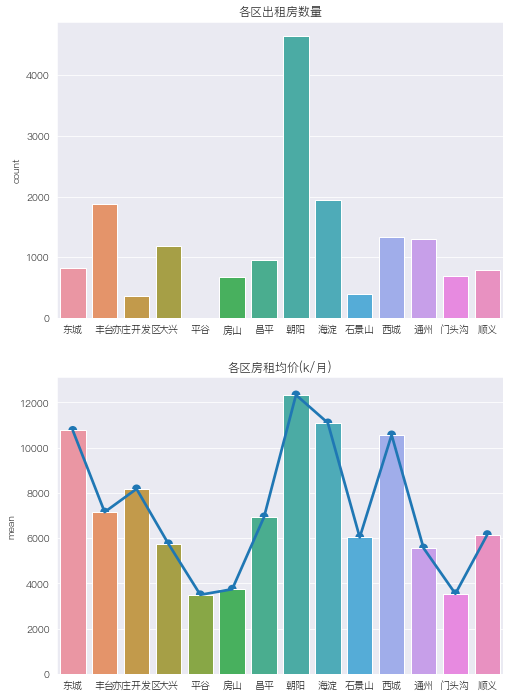

In [29]:
#  不同区域的房租价格
plt.figure(figsize=(8,12))
plt.subplot(211)
ax = sns.barplot(xvals, result.price['count'])
ax.set_title('各区出租房数量')
plt.subplot(212)
ax = sns.barplot(xvals, result.price['mean'])
sns.pointplot(xvals, result.price['mean'])
ax.set_title('各区房租均价(k/月)')

In [33]:
for i in range(2018, 2016):
    print(i)

In [32]:
for i in range(2016, 2018, 1):
    print(i)

2016
2017
